# Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

## 1. K-Means Clustering

[Youtube Video](https://www.youtube.com/watch?v=FTtzd31IAOw&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=29)

[SKlearn documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)

In [2]:
from sklearn.cluster import KMeans

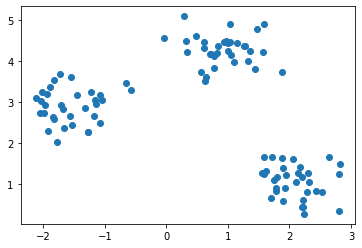

In [3]:
# Data generation

X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140675

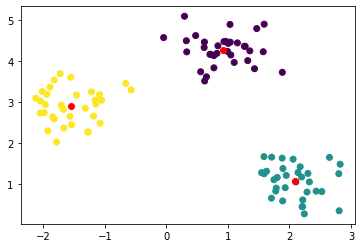

In [4]:
#Model 

model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

## Elbow Method

Text(0, 0.5, 'Model Cost (Inertia)')

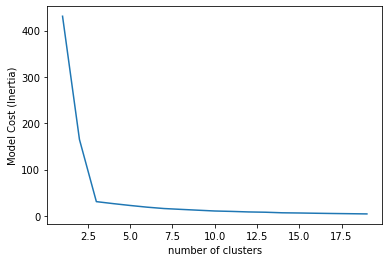

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('number of clusters')
plt.ylabel('Model Cost (Inertia)')

##  2. Anomaly detection with Isolation Forest

In [6]:
from sklearn.ensemble import IsolationForest

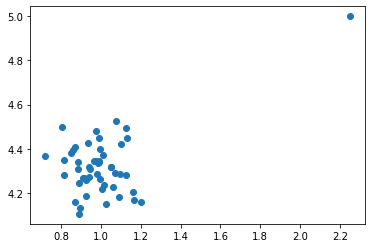

In [7]:
#Dataset 

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

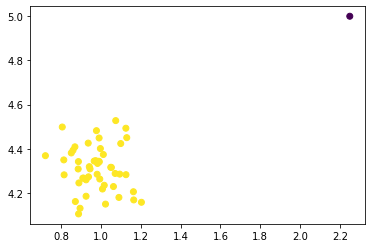

In [8]:
#Model 

model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

## Application: Digits Outliers

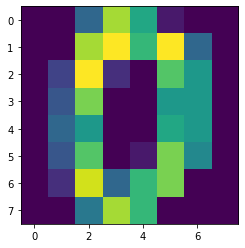

In [9]:
from sklearn.datasets import load_digits

#Dataset 

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

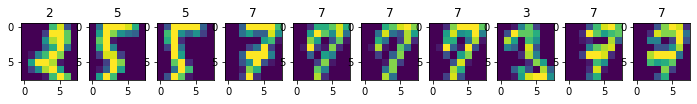

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 3. PCA : Reduction de dimension

### 2D visualization

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

In [11]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

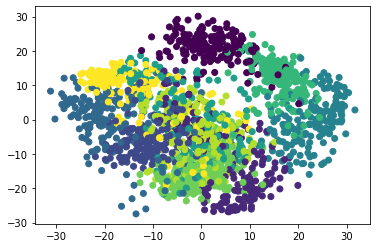

In [12]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

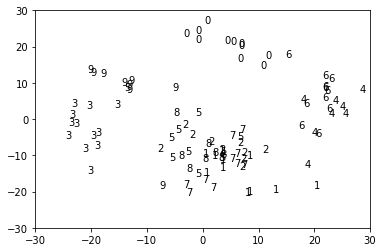

In [13]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

## Data compression

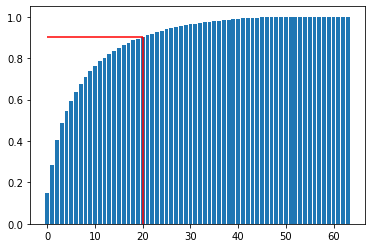

In [14]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

best_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, best_dims, colors='r')
plt.vlines(best_dims, 0, 0.90, colors='r')

In [15]:
model = PCA(n_components=0.99) #We need to optain 99% of originality of hour resizing datas 
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressed')

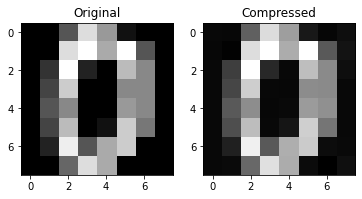

In [16]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressed')